2024-04-11 10:04:38,029 [INFO] trace here plot traces in plotting


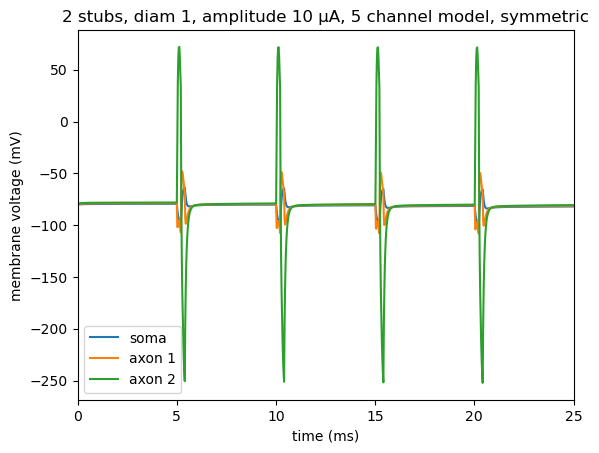

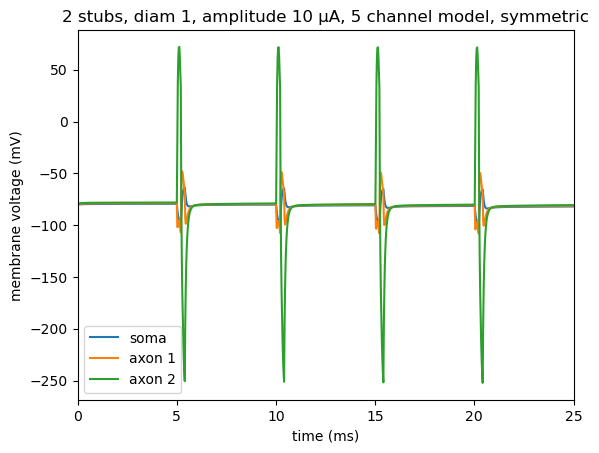

In [1]:
from bmtk.analyzer.compartment import plot_traces

'''set the legend for the variables in the file users/ankev/anaconda/envs/thesis/Lib/site_packages/bmtk/utils/report/compartment/plotting.py'''
#dir='sim_waveform_5ms_pause/axon_10_diam_1/amplitude_20/conduct_hh'
dir='sim_axon_2_diam_1/network_1/waveform_4_5ms/amplitude_10/simulation_0'
title_plot='2 stubs, diam 1, amplitude 10 µA, 5 channel model, symmetric'

plot_traces(config_file=dir+'/config.json', sections="all", report_name='v_report',node_ids=[0], title=title_plot, show_legend=True, save_as=dir+'/output/'+title_plot+'.png')


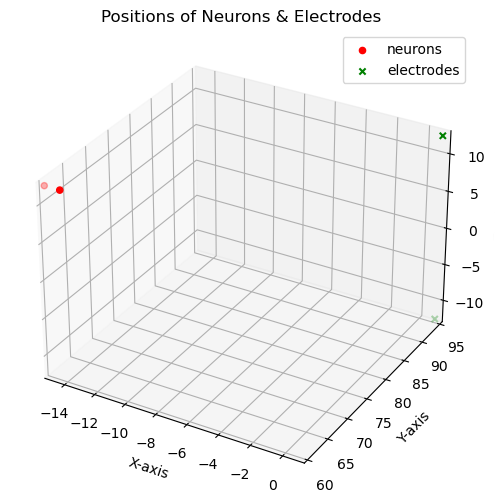

In [34]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

def get_positions_small(network_folder):
        """Get node positions.
        :return: node positions
        :rtype: ndarray
        """
        network=h5py.File(network_folder+'/net_nodes.h5', 'r')
        positions = network.file['nodes']['net']['0']['positions'][:,:]
        x_pos = positions[:,0]
        y_pos = positions[:,1]
        z_pos = positions[:,2]

        return positions, x_pos, y_pos, z_pos


def get_spikes(simulation_folder,network_folder):
    """Get spikes and node positions from network and output files.
    """        
    nodes = h5py.File(network_folder+'/net_nodes.h5', 'r')
    spikes= h5py.File(simulation_folder+'/output/spikes.h5', 'r')

    positions = nodes.file['nodes']['net']['0']['positions'][:,:]
    x_pos = positions[:,0]
    y_pos = positions[:,1]
    z_pos = positions[:,2]
    node_ids = nodes.file['nodes']['net']['node_id']
    
    spike_ids = spikes.file['spikes']['net']['node_ids']
    x_spike=[]
    y_spike=[]
    z_spike=[]
    for index,id in enumerate(node_ids):
        if id in spike_ids:
            x_spike.append(x_pos[index])
            y_spike.append(y_pos[index])
            z_spike.append(z_pos[index])

    positions_with_spikes = np.column_stack((x_spike, y_spike, z_spike))
                                                    
    return positions_with_spikes

def filter_positions(positions, positions_spikes):
     set_positions={tuple(coordinate) for coordinate in positions}
     set_positions_spikes={tuple(row) for row in positions_spikes}

     filtered_positions = set_positions - set_positions_spikes
     filtered_positions = np.array(list(filtered_positions))

     filtered_x=filtered_positions[:,0]
     filtered_y=filtered_positions[:,1]
     filtered_z=filtered_positions[:,2]

     return filtered_positions, filtered_x, filtered_y, filtered_z

def plot_pos_spikes_el(simulation_folder, network_folder):
    # positions all neurons
    positions, x, y, z =get_positions_small(network_folder)

    positions_spikes = get_spikes(simulation_folder, network_folder)
    #print(positions_spikes)

    #filter the neurons that spike out
    filtered_positions, filtered_x, filtered_y, filtered_z = filter_positions(positions, positions_spikes)
    #print(filtered_positions.shape)

    position_electrode_0=(1, 95, 37.5)
    position_electrode_1=(1,95,12.5)
    electrodes=np.row_stack((position_electrode_0,position_electrode_1))

    # Create a figure and a 3D axis
    fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))


    # Define the limits for X, Y, and Z axes
    x_min = min(filtered_x.min(), positions_spikes[:, 0].min(), electrodes[:, 0].min())
    x_max = max(filtered_x.max(), positions_spikes[:, 0].max(), electrodes[:, 0].max())
    y_min = min(filtered_y.min(), positions_spikes[:, 1].min(), electrodes[:, 1].min())
    y_max = max(filtered_y.max(), positions_spikes[:, 1].max(), electrodes[:, 1].max())
    z_min = min(filtered_z.min(), positions_spikes[:, 2].min(), electrodes[:, 2].min())
    z_max = max(filtered_z.max(), positions_spikes[:, 2].max(), electrodes[:, 2].max())

    # Set the limits for both subplots
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_zlim(z_min, z_max)

    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_zlim(z_min, z_max)


    # Create 3D scatter plot for all positions
    ax1.scatter(filtered_x, filtered_y, filtered_z, c='blue', label='Neurons')
    ax1.scatter(positions_spikes[:, 0], positions_spikes[:, 1], positions_spikes[:, 2], c='red', label='Spikes')
    ax1.scatter(electrodes[:,0], electrodes[:,1], electrodes[:,2], marker='x', c='green', label='electrodes')
    ax1.set_title('Positions of Neurons')

    # Create 3D scatter plot for positions with spikes
    ax2.scatter(positions_spikes[:, 0], positions_spikes[:, 1], positions_spikes[:, 2], c='red', label='Spikes')
    ax2.scatter(electrodes[:,0], electrodes[:,1], electrodes[:,2], marker='x', c='green', label='electrodes')
    ax2.set_title('Positions of exclusively Neurons with Spikes')

    for ax in (ax1, ax2):
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        ax.legend()

    fig.suptitle(simulation_folder)

    # Show plot
    plt.show()

def plot_pos_neur_el(net_dir,pos_el_1,pos_el_2):

    positions, x_pos, y_pos, z_pos = get_positions_small(net_dir)
    electrodes=np.row_stack((pos_el_1,pos_el_2))

    fig= plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111, projection='3d')
    x_min = min(positions[:, 0].min(), electrodes[:, 0].min())
    x_max = max( positions[:, 0].max(), electrodes[:, 0].max())
    y_min = min(positions[:, 1].min(), electrodes[:, 1].min())
    y_max = max(positions[:, 1].max(), electrodes[:, 1].max())
    z_min = min(positions[:, 2].min(), electrodes[:, 2].min())
    z_max = max(positions[:, 2].max(), electrodes[:, 2].max())

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', label='neurons')
    ax.scatter(electrodes[:,0], electrodes[:,1], electrodes[:,2], marker='x', c='green', label='electrodes')
    ax.set_title('Positions of Neurons & Electrodes')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    plt.show()
    

#plot_pos_spikes_el('prev_simulations/simulation_axonlength_2_diam_1','prev_networks/network_mask')
sim_dir = 'sim_waveform_with_pause_2s/sim_axon_diam_1/amplitude_20/conduct_copy_soma'
net_dir = 'networks/test_network'
el_1 = (1, 95, 12.5)
el_2 = (1, 95, -12.5)
plot_pos_neur_el(net_dir,el_1, el_2)
#plot_pos_spikes_el(sim_dir , net_dir)

In [ ]:
import numpy as np
from ipdb import set_trace
import h5py
import sys

def get_spike_positions(simulation_folder,network_folder):
    """Get spikes and node positions from network and output files.
    """        
    nodes = h5py.File(network_folder+'/net_nodes.h5', 'r')
    spikes= h5py.File(simulation_folder+'/output/spikes.h5', 'r')

    positions = nodes.file['nodes']['net']['0']['positions'][:,:]
    x_pos = positions[:,0]
    y_pos = positions[:,1]
    z_pos = positions[:,2]
    node_ids = nodes.file['nodes']['net']['node_id']
    
    spike_ids = spikes.file['spikes']['net']['node_ids']
    x_spike=[]
    y_spike=[]
    z_spike=[]
    for index,id in enumerate(node_ids):
        if id in spike_ids:
            x_spike.append(x_pos[index])
            y_spike.append(y_pos[index])
            z_spike.append(z_pos[index])

    positions_with_spikes = np.column_stack((x_spike, y_spike, z_spike))
                                                    
    return positions_with_spikes

def get_spike_rotation_angles(simulation_folder, network_folder):
    nodes = h5py.File(network_folder+'/net_nodes.h5', 'r')
    spikes= h5py.File(simulation_folder+'/output/spikes.h5', 'r')

    rotation_x = nodes.file['nodes']['net']['0']['rotation_angle_xais']
    rotation_y = nodes.file['nodes']['net']['0']['rotation_angle_yaxis']
    rotation_z = nodes.file['nodes']['net']['0']['rotation_angle_zaxis']
    node_ids = nodes.file['nodes']['net']['node_id']
    
    spike_ids = spikes.file['spikes']['net']['node_ids']
    x_angle=[]
    y_angle=[]
    z_angle=[]
    for index,id in enumerate(node_ids):
        if id in spike_ids:
            x_angle.append(rotation_x[index])
            y_angle.append(rotation_y[index])
            z_angle.append(rotation_z[index])

    rotation_angles = np.column_stack((x_angle, y_angle, z_angle))
    
    return rotation_angles

def get_spike_info_all(simulation_folder, network_folder):
    '''get information from the nodes that spikes
    !!caution the returning lists do not match e.g. the first node id is not the first position'''


    spikes= h5py.File(simulation_folder+'/output/spikes.h5', 'r')

    #get the unique node ids of the neurons that spiked
    ids=spikes.file['spikes']['net']['node_ids']
    unique_ids=np.unique(ids)

    #get the edge file

    edges=h5py.File(network_folder+'/net_net_edges.h5','r')
    source_ids = edges.file['edges']['net_to_net']['source_node_id']
    target_ids = edges.file['edges']['net_to_net']['target_node_id']

    #get edge connections
    edge_ids_source=[]
    for index,s_id in enumerate(source_ids):
        if s_id in unique_ids:
            print('the source id is', s_id)
            edge_ids_source.append(index)

    source_spike=[]
    target_spike=[]
    for edge_id in edge_ids_source:
        if target_ids[edge_id] in unique_ids:
            print('the target id is:', target_ids[edge_id])
            source_spike.append(source_ids[edge_id])
            target_spike.append(target_ids[edge_id])
    
    edges_between_spike_nodes = np.column_stack((source_spike, target_spike))

    #get the unique positions
    positions = get_spike_positions(simulation_folder, network_folder)
    unique_positions=np.unique(positions, axis=0)

    #get the unique rotationangles
    #rotation_angles=get_spike_rotation_angles(simulation_folder,network_folder)
    #unique_rotation=np.unique(rotation_angles, axis=0)

    # Save a reference to sys.stdout
    original_stdout = sys.stdout

    # print information to txt file
    with open(simulation_folder+'/output/analysis_spike_pattern.txt', 'w') as file:
        sys.stdout = file
    
        print('the node ids of spiking neurons:', unique_ids)
        print('the locations of spiking neurons:', unique_positions)
        #print('the rotation angles of spiking neurons:', unique_rotation)
        print('the spiking nodes that are connected are:', edges_between_spike_nodes, 'with the first column the id of the source node and the second column the id of the target node')
    
        # Restore sys.stdout to its original value
        sys.stdout = original_stdout
        
    return unique_ids, unique_positions,  edges_between_spike_nodes


ids, positions, shared_edges = get_spike_info_all('simulation_basic','2_neuron_net_full_connect')


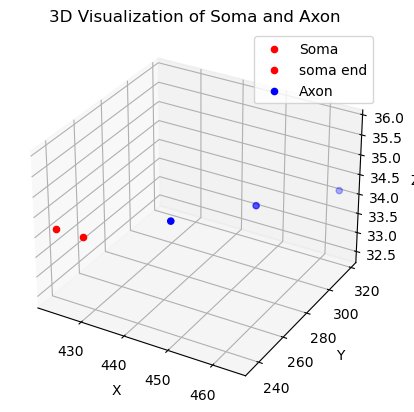

In [33]:
#plot the direction of the axon wrt the soma

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_coordinates(axon_seg_coor, soma_mid):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot soma coordinates
    ax.scatter(soma_mid[0], soma_mid[1], soma_mid[2], c='r', label='Soma')

    # Plot axon coordinates
    ax.scatter(axon_seg_coor[0, 0], axon_seg_coor[0, 1], axon_seg_coor[0, 2], c='r', label='soma end')
    ax.scatter(axon_seg_coor[1:, 0], axon_seg_coor[1:, 1], axon_seg_coor[1:, 2], c='b', label='Axon')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title('3D Visualization of Soma and Axon')
    plt.show()

# Example usage:
# Assuming axon_seg_coor and soma_mid are the output of your function
axon_seg_coor = np.array([[429.11898804, 235.55000305, 34.15999985],
                          [440.80154308, 263.18183085, 34.15999985],
                          [452.48409813, 290.81365865, 34.15999985],
                          [464.16665317, 318.44548646, 34.15999985]])
soma_mid = np.array([422.70800781, 235.55000305, 34.15999985])
plot_3d_coordinates(axon_seg_coor, soma_mid)



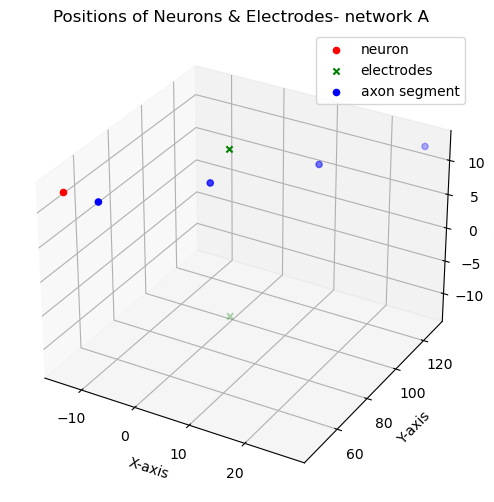

In [27]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

def get_positions_small(network_folder):
    """Get node positions.
    :return: node positions
    :rtype: ndarray
    """
    network = h5py.File(network_folder+'/net_nodes.h5', 'r')
    positions = network.file['nodes']['net']['0']['positions'][:,:]
    x_pos = positions[:,0]
    y_pos = positions[:,1]
    z_pos = positions[:,2]

    return positions, x_pos, y_pos, z_pos

def plot_pos_neur_el(net_dir, pos_el_1, pos_el_2, axon_seg_coor, soma_mid):

    positions, x_pos, y_pos, z_pos = get_positions_small(net_dir)
    electrodes = np.row_stack((pos_el_1, pos_el_2))

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot neuron and electrodes
    ax.scatter(positions[0, 0], positions[0, 1], positions[0, 2], c='red', label='neuron')
    ax.scatter(electrodes[:,0], electrodes[:,1], electrodes[:,2], marker='x', c='green', label='electrodes')

    # Plot axon segment coordinates relative to soma_mid
    soma_x, soma_y, soma_z = soma_mid
    axon_x_rel = axon_seg_coor[:, 0] - soma_x + positions[0,0]
    axon_y_rel = axon_seg_coor[:, 1] - soma_y + positions[0,1]
    axon_z_rel = axon_seg_coor[:, 2] - soma_z + positions[0,2]

    ax.scatter(axon_x_rel, axon_y_rel, axon_z_rel, c='blue', label='axon segment')

    ax.set_title('Positions of Neurons & Electrodes- network A')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    plt.show()

axon_seg_coor = np.array([[429.11898804, 235.55000305, 34.15999985],
                          [440.80154308, 263.18183085, 34.15999985],
                          [452.48409813, 290.81365865, 34.15999985],
                          [464.16665317, 318.44548646, 34.15999985]])
soma_mid = np.array([422.70800781, 235.55000305, 34.15999985])    

net_dir = 'networks/network_A'
el_1 = (1, 95, 12.5)
el_2 = (1, 95, -12.5)
plot_pos_neur_el(net_dir, el_1, el_2, axon_seg_coor, soma_mid)

